fixed_point: (-1.0000000000000002, -4.4408920985006262e-16)


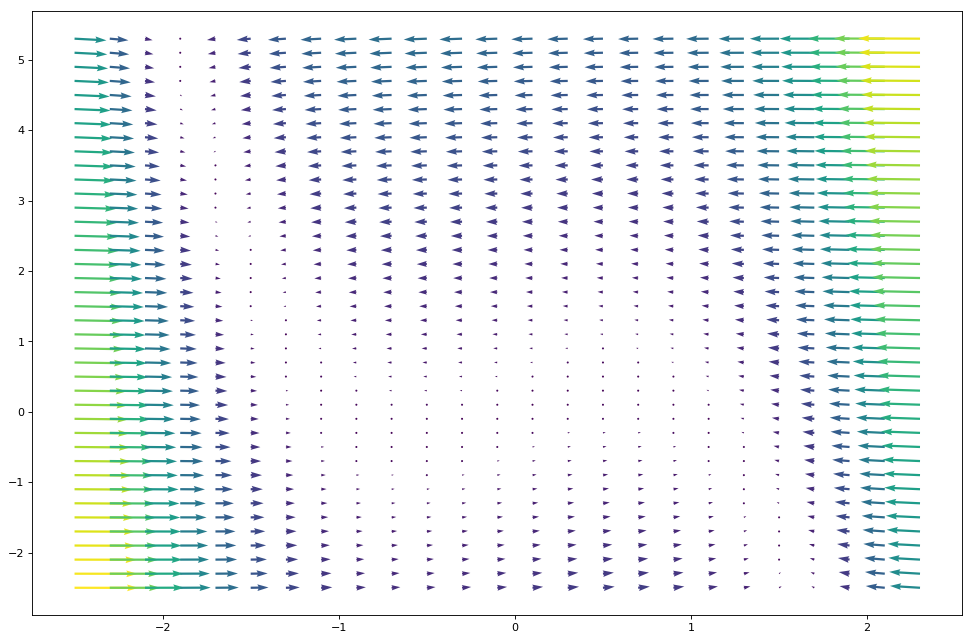

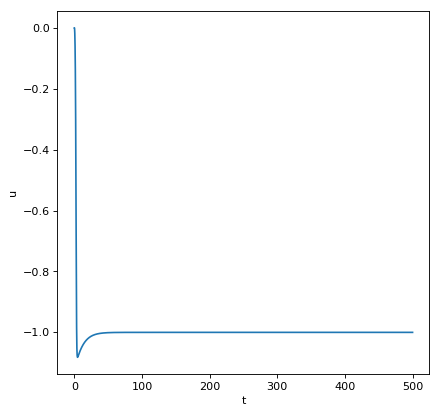

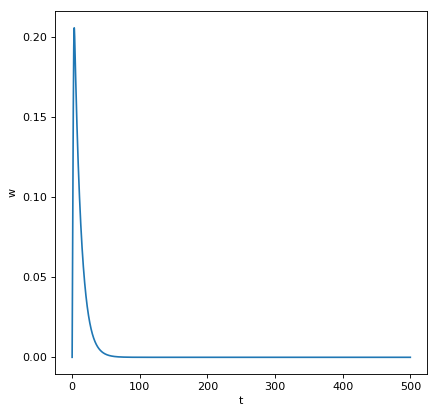

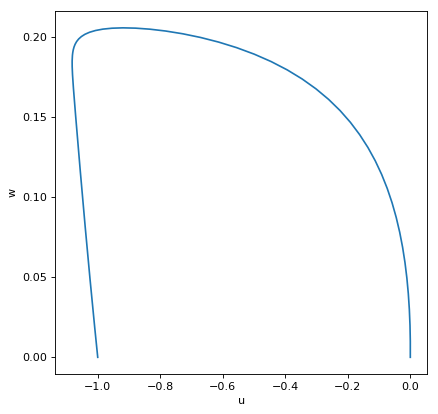

In [11]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.phase_plane_analysis import fitzhugh_nagumo

plt.figure(figsize=(15,10),dpi=80)
fitzhugh_nagumo.plot_flow()

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

plt.figure(figsize=(6,6),dpi=80)
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])
plt.xlabel('t')
plt.ylabel('u')

plt.figure(figsize=(6,6),dpi=80)
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[2])
plt.xlabel('t')
plt.ylabel('w')

plt.figure(figsize=(6,6),dpi=80)
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[1], trajectory[2])
plt.xlabel('u')
plt.ylabel('w')

## 7.1. Exercise: Phase plane analysis

### 7.1.1

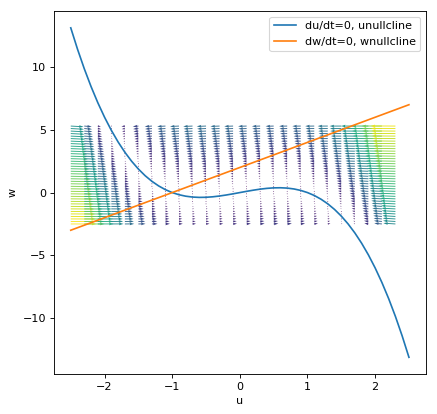

In [24]:
u = np.arange(-2.5, 2.51, .1)
w1 = u*(1-u**2)

w2=2*u+2

plt.figure(figsize=(6,6),dpi=80)
plt.plot(u, w1,label='du/dt=0, unullcline')
plt.plot(u, w2,label='dw/dt=0, wnullcline')

plt.xlabel('u')
plt.ylabel('w')
plt.legend()

### 7.1.2. Question
Get the lists t, u and w by calling t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I) for u0=0, w0=0 and I=1.3. They are corresponding values of tt, u(t)u(t) and w(t)w(t) during trajectories starting at the given point (u0,w0)(u0,w0) for a given constant input current II. Plot the nullclines for this given current and the trajectories into the u−wu−w plane.

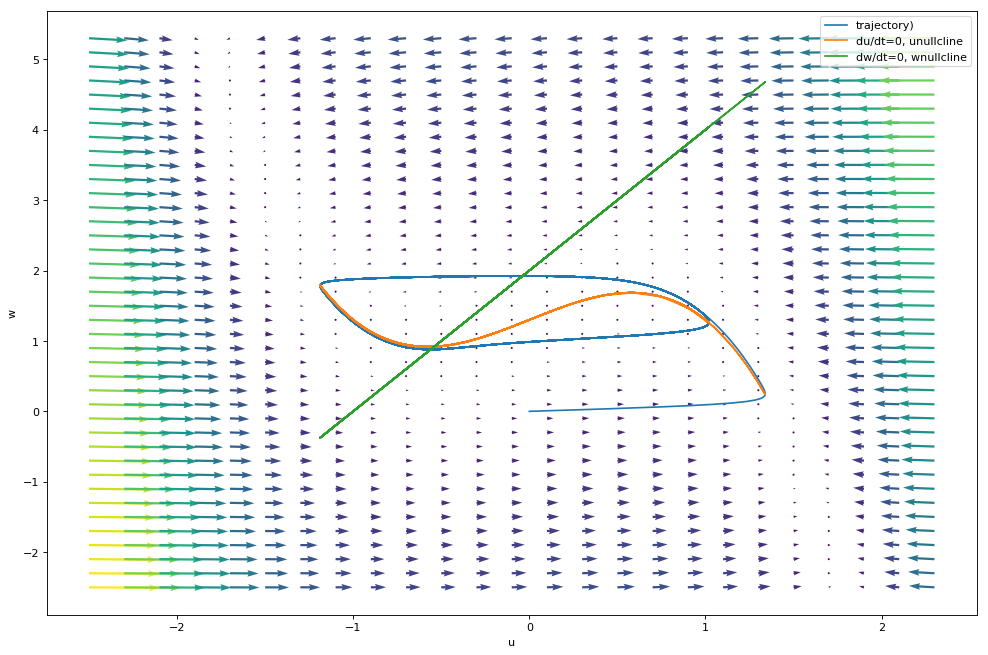

In [50]:
u_0=0
w_0=0  
I=1.3
t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I) 

w1 = u*(1-u**2)+I
w2=2*u+2


plt.figure(figsize=(15,10),dpi=80)
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(u, w, label='trajectory)')
plt.plot(u, w1,label='du/dt=0, unullcline')
plt.plot(u, w2,label='dw/dt=0, wnullcline')
fitzhugh_nagumo.plot_flow(I, eps=0.1, a=0.0)
plt.legend()
plt.xlabel('u')
plt.ylabel('w')

### 7.1.3. Question
At this point for the same current II, call the function plot_flow, which adds the flow created by the system Eq. (1) to your plot. This indicates the direction that trajectories will take.

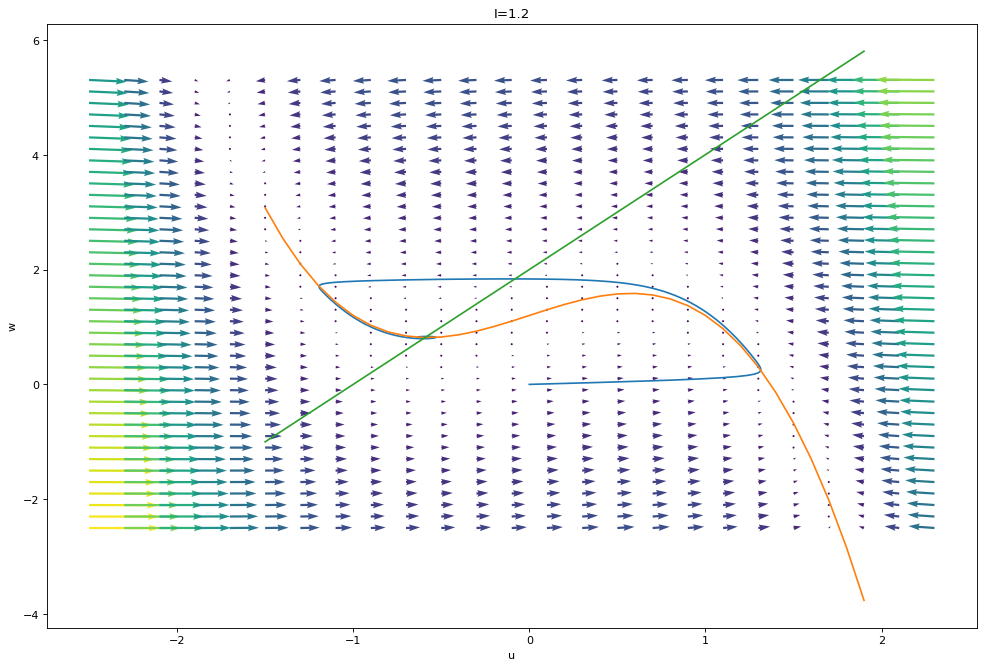

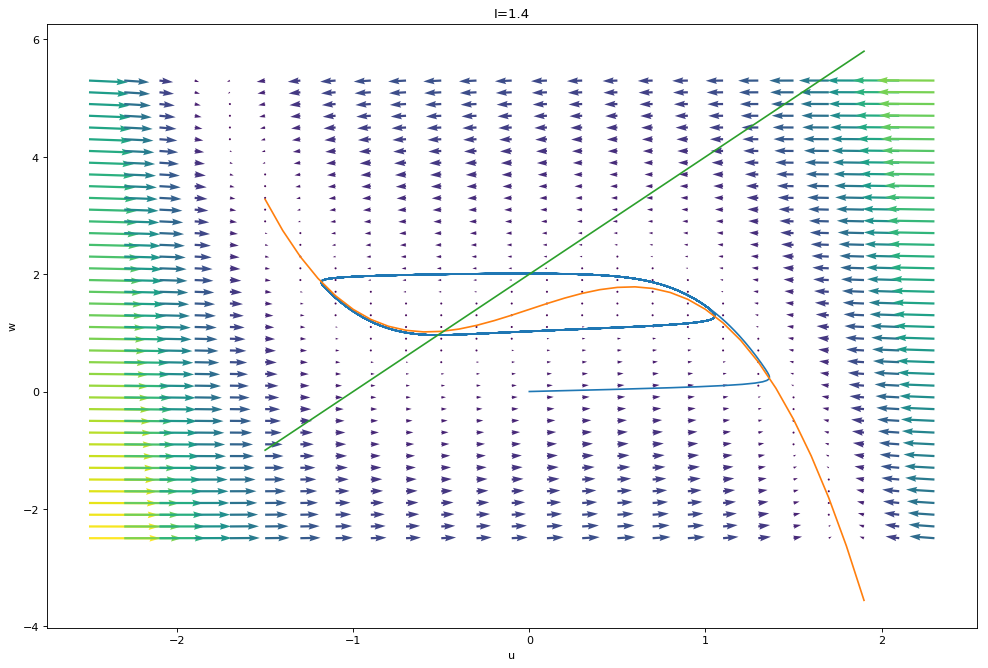

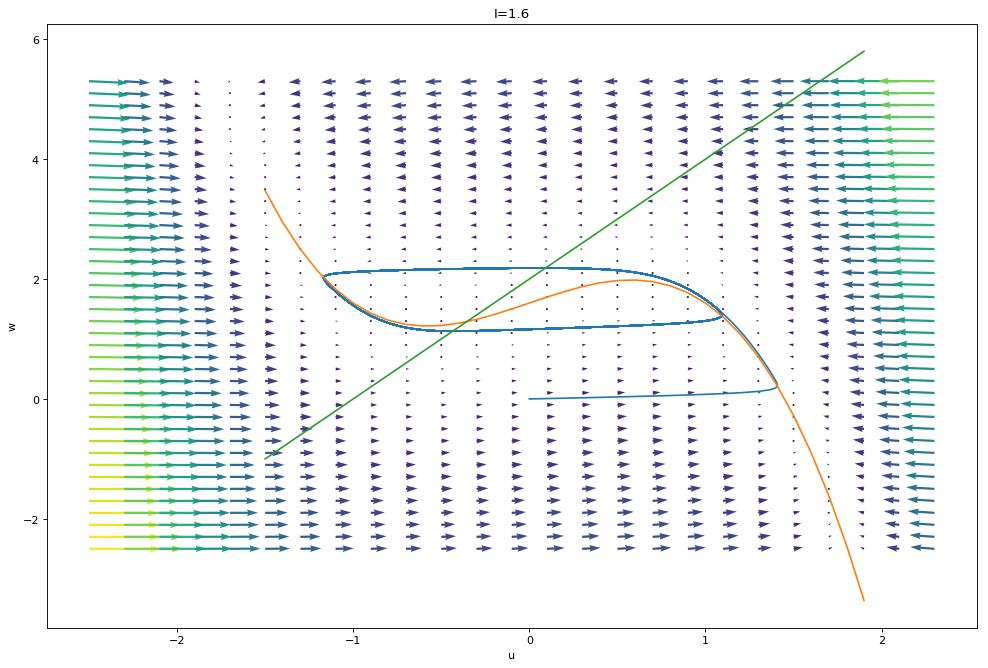

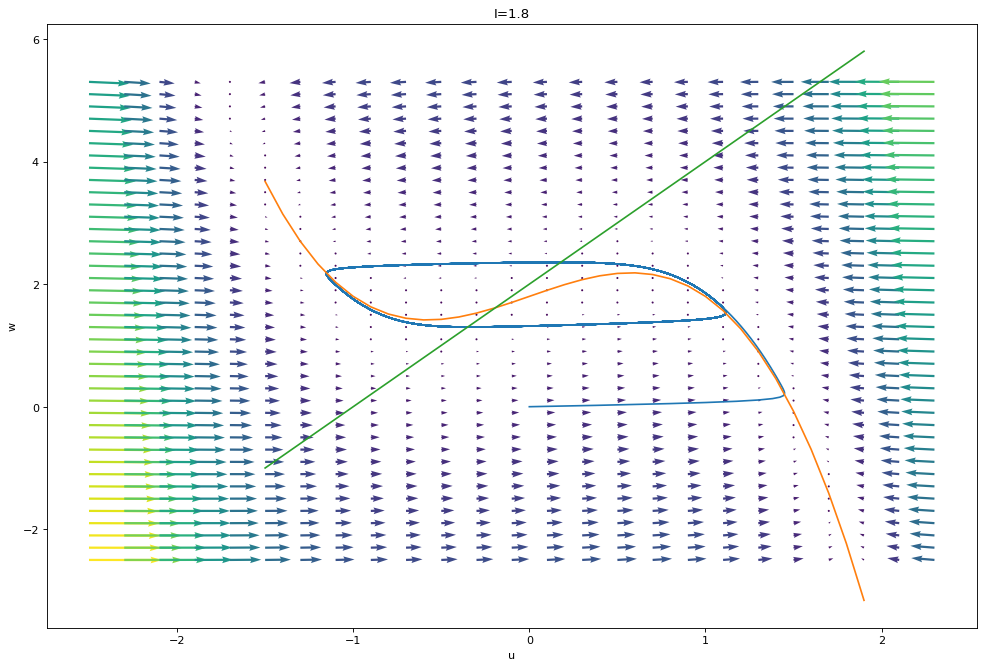

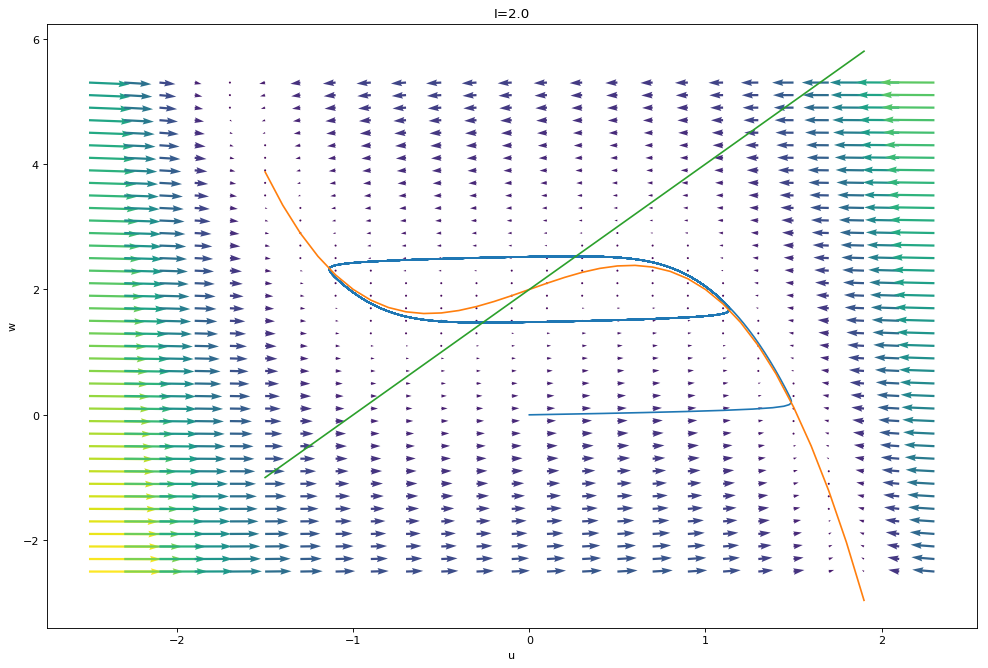

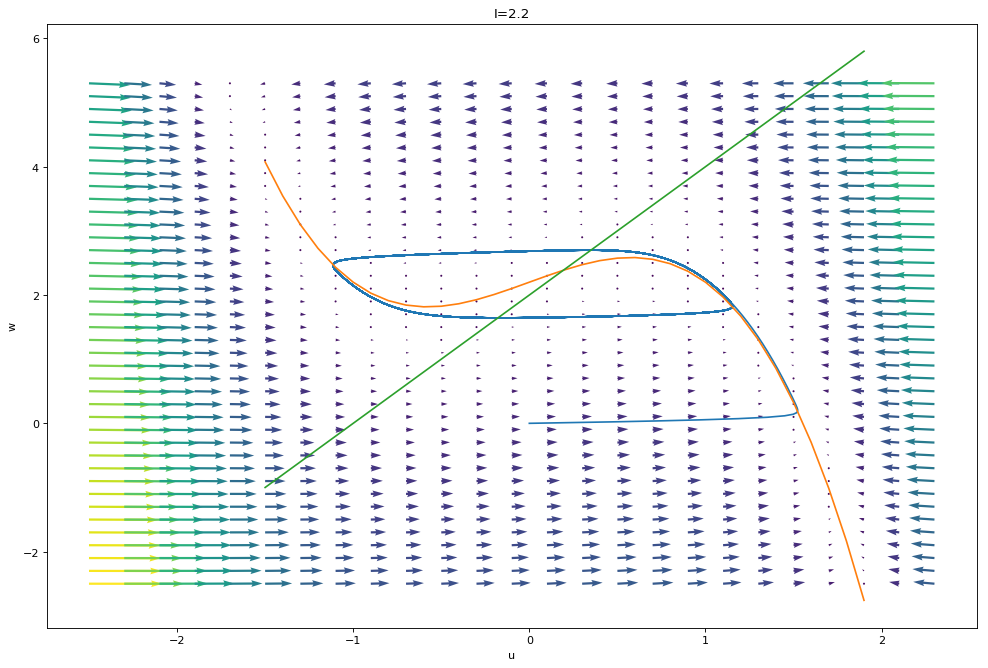

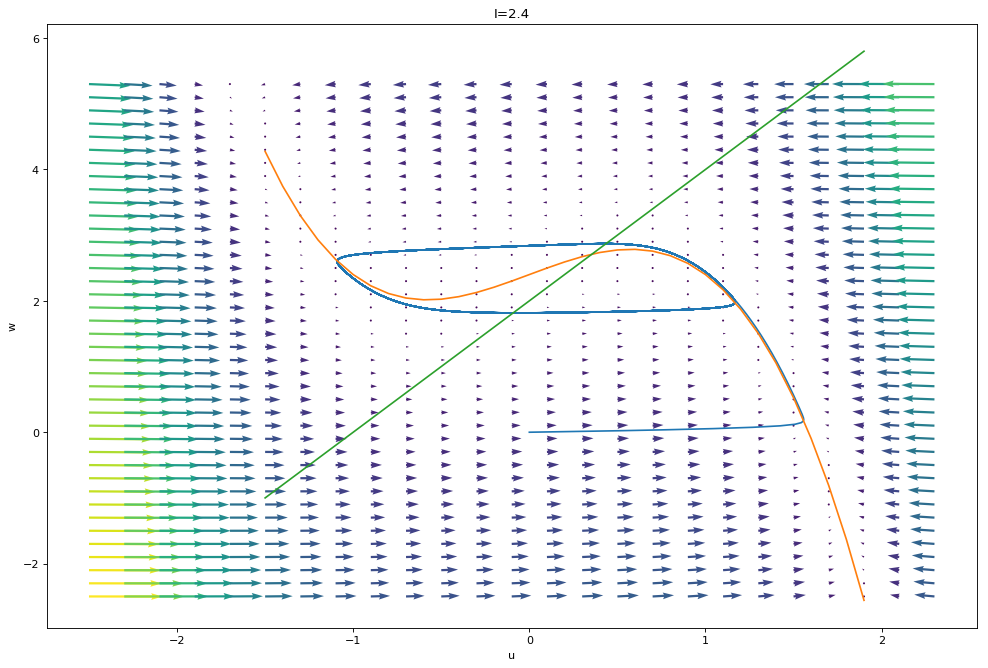

In [49]:
u_0=0
w_0=0  
I=3

I_vec=np.arange(1.2, 2.6, .2)


for I in I_vec:
    t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I)
    ui = np.arange(-1.5, 2, .1)
    w1 = ui*(1-ui**2)+I
    w2=2*ui+2


    plt.figure(figsize=(15,10),dpi=80)
    plt.plot(u, w, label='trajectory)')
    plt.plot(ui, w1,label='du/dt=0, unullcline')
    plt.plot(ui, w2,label='dw/dt=0, wnullcline')
    fitzhugh_nagumo.plot_flow(I)

    plt.xlabel('u')
    plt.ylabel('w')
    plt.title('I='+str(I))

In [78]:
def get_jacobian(u_0,w_0):
    return [[1-3*u_0**2,-1],[0.1,-0.05]]

In [79]:
def fixed_point_J(I):
    u_0,w_0 = fitzhugh_nagumo.get_fixed_point(I) 
    return get_jacobian(u_0,w_0)

In [86]:
I_vec=np.arange(0, 5, .1)

for I in I_vec:

    J=fixed_point_J(I)
    eigenvalues=np.linalg.eigvals(J)
    print 'I=',I, 'eigenvalues:',eigenvalues.real
 





I= 0.0 eigenvalues: [-1.94729334 -0.10270666]
I= 0.1 eigenvalues: [-1.79163339 -0.10741736]
I= 0.2 eigenvalues: [-1.6329842  -0.11317182]
I= 0.3 eigenvalues: [-1.47086653 -0.12037959]
I= 0.4 eigenvalues: [-1.30454415 -0.12971023]
I= 0.5 eigenvalues: [-1.13276468 -0.14235617]
I= 0.6 eigenvalues: [-0.95306357 -0.16073418]
I= 0.7 eigenvalues: [-0.75926748 -0.19099053]
I= 0.8 eigenvalues: [-0.52316642 -0.26134213]
I= 0.9 eigenvalues: [-0.30830542 -0.30830542]
I= 1.0 eigenvalues: [-0.22335685 -0.22335685]
I= 1.1 eigenvalues: [-0.13755291 -0.13755291]
I= 1.2 eigenvalues: [-0.05115079 -0.05115079]
I= 1.3 eigenvalues: [ 0.03540848  0.03540848]
I= 1.4 eigenvalues: [ 0.12138115  0.12138115]
I= 1.5 eigenvalues: [ 0.20552194  0.20552194]
I= 1.6 eigenvalues: [ 0.39861115  0.1729102 ]
I= 1.7 eigenvalues: [ 0.61767732  0.09977295]
I= 1.8 eigenvalues: [ 0.76588331  0.07256655]
I= 1.9 eigenvalues: [ 0.86078439  0.05979547]
I= 2.0 eigenvalues: [ 0.89407637  0.05592363]
I= 2.1 eigenvalues: [ 0.86078439  